#                          SOLUTION 49x - Technical Assessment

### Exploratory Data Analysis and Data Cleansing on DRONE DELIVERY

#### Seby Tom Sebastian
Date: 24th SEPTEMBER 2018


Dataset: DRONE DELIVERY

Dataset Columns: 
{Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare}

Environment: Python 3.6.3 and Jupyter notebook


# Task: Data Cleaning
## 1. Introduction
For this assessment, you are required to write Python (Python 2/3) code to analyze your dataset,
find and fix the problems in the data.  

In [1]:
#Basic scientific python libs
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use( 'ggplot' )
from IPython.core.display import HTML
import folium
import datetime
from datetime import datetime
import numpy as np
from math import radians, cos, sin, asin, sqrt

# Loading The Dataset
The Drone Delivery Dataset is imported into the dataframe for data wrangling.And,the dataframe values are shown in the following statement:

In [2]:
droneDeliveryData = pd.read_csv("DroneDataset.csv")
droneDeliveryData

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1274363481,2.0,0.0,23.187,38.0,3.0,-37.511008,147.810732,-37.788444,145.178614,234.024,2018-06-08,01:12:16,222.95,4:55:12,148.69
1,ID1599843443,1.0,0.0,9.142,7.0,12.0,-37.289800,144.797326,-37.565433,143.444277,123.480,2018-01-15,14:35:52,128.34,16:44:12,87.17
2,ID5279774224,1.0,1.0,23.702,3.0,26.0,-37.811809,145.220138,-38.895213,143.987806,161.605,2018-06-23,10:56:48,165.84,13:42:38,119.76
3,ID1480586689,1.0,0.0,17.895,57.0,32.0,-38.529900,147.794271,-37.060016,148.327543,170.213,2018-06-03,07:54:02,174.31,10:48:20,78.11
4,ID5769177567,1.0,1.0,25.340,12.0,50.0,-37.607170,143.731155,-36.722149,145.550903,189.110,2018-01-02,17:20:43,192.89,20:33:36,133.39
5,ID1674748266,1.0,0.0,18.164,2.0,18.0,-36.601844,147.893892,-38.108014,145.759877,252.507,2018-04-06,04:32:15,255.25,8:47:30,114.37
6,ID1452319444,1.0,0.0,33.823,62.0,11.0,-36.659068,144.575303,-36.936135,145.129680,58.251,2018-02-03,09:59:33,64.18,11:03:43,74.82
7,ID1219413371,1.0,0.0,47.075,61.0,20.0,-37.849252,146.698867,-37.327160,147.288240,77.977,2018-07-12,21:17:02,83.58,22:40:36,107.45
8,ID1565924581,2.0,0.0,5.949,19.0,34.0,-38.632037,143.456694,-38.465476,144.012967,51.856,2018-07-28,03:43:08,54.79,4:37:55,132.97
9,ID1950248143,1.0,0.0,26.375,36.0,31.0,-37.405509,145.536177,-36.641704,143.462902,202.925,2018-05-04,16:19:52,206.48,19:46:20,100.87


The csv file contains information about the delivery of packages from one location to another in what amount of time. The Dataset consists of detail informtation about the latitude and longtitude data of the Orgin and destination, along with the distance travelled and time taken for the delivery. The shape function helps to find the number of rows and column in the dataset.

In [3]:
print (droneDeliveryData.shape) 

(36453, 16)


In [4]:
droneDeliveryData.describe(include=['O'])

,Id,Departure Date,Departure Time,Delivery Time
count,36431,36453,36453,36453
unique,36393,277,29695,29764
top,ID1741940402,2018-07-20,00:58:37,13:44:57
freq,2,218,6,5


In [5]:
droneDeliveryData.isnull().sum()

Id                       22
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

From the aforementioned decription, it shows the details of the count NULL rows we have in the dataset across each columns. Each of the NULL values needs to be filled after analyzing the dataset carefully. The dataset has a spdcific granularity expalining the time information of a drone delivery from a point to point location describing the latitudes and longitudes, along with the distance travelled.

* missing value
* info about the missing value
* unique 
* duplicates
* missing values
* different values in one type of column  - for sex - age value comes
* when the value doesnt make sense

Dataset: Column 'ID':
The Id of the dataset is the unique identification of each row. The id seems to be an auto generated value. And,if at all, we have a discrepency, it could be the fact that we have duplicate values in it or NULL values. Checking the for duplicate values in the dataset for ID column.

In [6]:
len(droneDeliveryData[droneDeliveryData["Id"].isnull()]["Id"])

22

In [7]:
df = droneDeliveryData[droneDeliveryData.duplicated(droneDeliveryData.columns.values, keep=False)]
print(df.shape)

(76, 16)


In [8]:
droneDeliveryData[droneDeliveryData.duplicated(droneDeliveryData.columns.values, keep="first")]
droneDeliveryData.drop_duplicates(droneDeliveryData.columns.values, keep='first', inplace=True)

In [9]:
df = droneDeliveryData[droneDeliveryData.duplicated(droneDeliveryData.columns.values, keep=False)]
df.shape

(0, 16)

In [10]:
df = droneDeliveryData[droneDeliveryData.duplicated(["Drone Type","Package Weight","Destination Region","Origin Latitude", 
                                                    "Origin Longitude", "Departure Time","Travel Time"], keep=False)]
df.shape

(44, 16)

In [11]:
droneDeliveryData.drop_duplicates(["Destination Region","Origin Latitude", 
                                                    "Origin Longitude", "Departure Time"], keep='first',inplace=True)


In [12]:
df = droneDeliveryData[droneDeliveryData.duplicated(["Destination Region","Origin Latitude", 
                                                    "Origin Longitude", "Departure Time"], keep=False)]
df.shape

(0, 16)

In [13]:
droneDeliveryData.describe(include=['O'])

,Id,Departure Date,Departure Time,Delivery Time
count,36393,36393,36393,36393
unique,36393,277,29695,29764
top,ID1810919554,2018-07-20,00:58:37,23:12:59
freq,1,217,6,5


In [14]:
droneDeliveryData.isnull().sum()

Id                        0
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

The NULL values of the ID have been removed. As per the description of the dataframe. There are no more null values in the Id column. By cleansing the repeating IDs and removing the duplicates we have cleared all the issues regarding the IDs. 

# General equation for finding time travel - from internet

As per the above desription, errors exist in the Travel Time column. It is necessary to develop a formula inirder to clean the travel time information. 

In [15]:
from datetime import datetime
from datetime import timedelta
s1 = '15:17:41'
s2 = '14:19:45' # for example
FMT = '%H:%M:%S'
tdelta = datetime.strptime(s2, FMT) - datetime.strptime(s1, FMT)
if tdelta.days < 0:
    tdelta = timedelta(days=0,
                seconds=tdelta.seconds, microseconds=tdelta.microseconds)
    
print(tdelta)
print(tdelta.total_seconds() / 60)

23:02:04
1382.0666666666666


# Date Format Correction
Some dates are out of format and that has to be corrected.

In [16]:
import datetime
count = 0
listDates = droneDeliveryData["Departure Date"]
for each in listDates:
    try:
        datetime.datetime.strptime(each, '%Y-%m-%d')
    except ValueError:
        count = count + 1
print("\nThe number of dates which are not in proper format: ---->",count)


The number of dates which are not in proper format: ----> 228


The number of dates which are not in proper format: ----> 228

There are 228 dates in the dataframe which is not in the right format. Mainly, the Month and Date positions are interchanged.

Let's try changing it


In [17]:
from datetime import datetime
for index,row in droneDeliveryData.iterrows():
    date_text = row["Departure Date"]
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        if(date_text == '2018-02-30'):
            continue
        elif(date_text == '2018-06-31'):
            continue
        elif(date_text == '2018-04-31'):
            continue
        result = datetime.strptime(date_text, '%Y-%d-%m').strftime('%Y-%m-%d')
        droneDeliveryData.at[index,"Departure Date"] = result

In [18]:
import datetime
count = 0
listDates = droneDeliveryData["Departure Date"]
for each in listDates:
    try:
        datetime.datetime.strptime(each, '%Y-%m-%d')
    except ValueError:
        count = count + 1
print("\nThe number of dates which are not in proper format: ---->",count)


The number of dates which are not in proper format: ----> 100


In [19]:
for index,row in droneDeliveryData.iterrows():
    date_text = row["Departure Date"]
    if(date_text == '2018-02-30'):
        droneDeliveryData.at[index,"Departure Date"] = "2018-02-28"
    elif(date_text == '2018-06-31'):
        droneDeliveryData.at[index,"Departure Date"] = "2018-06-30"
    elif(date_text == '2018-04-31'):
        droneDeliveryData.at[index,"Departure Date"] = "2018-04-30"

In [20]:
import datetime
count = 0
listDates = droneDeliveryData["Departure Date"]
for each in listDates:
    try:
        datetime.datetime.strptime(each, '%Y-%m-%d')
    except ValueError:
        print(each)
        count = count + 1
print("\nThe number of dates which are not in proper format: ---->",count)


The number of dates which are not in proper format: ----> 0


# Symantic Errors

In [21]:
droneDeliveryData.head()
droneDeliveryData.shape

(36393, 16)

In [22]:
droneDeliveryData.isnull().sum()

Id                        0
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

## Missing Values to be Corrected
By taking the sum of total null values on the dataset, we see that the data from columns Drone Type, Post Type, Origin Region, Destination Region, Travel Time and Delivery Fare seems to be missing
## Travel Time - Missing Values
Fromt the above observation we have Travel Time of 40 records missing. We have the departure time and delivery time of all the drones. We can find the delivery time from this. As we have the Departure Time and Delivery time, we can deduce the travel time by taking the difference between the aforementioned two attributes.
# Write about Operation Hours (Important)

In [23]:
df = droneDeliveryData[droneDeliveryData["Travel Time"].isnull()]
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
76,ID5391189375,3.0,1.0,10.389,31.0,28.0,-36.737836,143.327609,-38.427990,146.386145,328.899,2018-01-01,09:49:16,NaN,14:15:46,192.38
425,ID5324884044,3.0,1.0,27.034,38.0,62.0,-37.615142,147.622410,-36.875549,144.533887,285.785,2018-07-26,20:12:11,NaN,0:04:38,211.62
2161,ID1765971029,1.0,0.0,44.055,51.0,11.0,-37.471860,148.239977,-36.785831,145.109528,288.118,2018-03-07,10:47:58,NaN,15:38:14,91.72
7247,ID5208380762,2.0,1.0,5.236,59.0,49.0,-36.507918,147.327737,-38.732887,147.130205,248.288,2018-06-12,20:10:01,NaN,0:06:07,169.09
8304,ID5728054827,1.0,1.0,31.197,21.0,3.0,-36.545482,144.940726,-37.649641,145.135428,124.121,2018-06-17,21:53:41,NaN,0:02:39,148.90


### Lets try to find the time difference and store it back to df

In [24]:
from datetime import datetime
import numpy as np
for index,row in df.iterrows():
    s1 = row["Departure Time"]
    s2 = row["Delivery Time"]
    FMT = '%H:%M:%S'
    tdelta = datetime.strptime(s2, FMT) - datetime.strptime(s1, FMT)
    
    if tdelta.days < 0:
        tdelta = timedelta(days=0,seconds=tdelta.seconds, microseconds=tdelta.microseconds)
        
    tdelta = (tdelta.total_seconds() / 60)
    df.at[index,"Travel Time"] = tdelta
    droneDeliveryData.at[index,"Travel Time"] = tdelta

In [25]:
df = droneDeliveryData[droneDeliveryData["Travel Time"].isnull()]
df.shape

(0, 16)

In [26]:
droneDeliveryData.isnull().sum()

Id                        0
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            30
dtype: int64

# Latitude and Longitude(Regions)
Origin Region.
Before we begin, we can check the isnull value for this Origin Region. 
We can see that there are 10 rows which doesn't have the Origin Region specified. We have to fill this up.

In [27]:
originRegionMean = droneDeliveryData.groupby(['Origin Region']).mean()
originRegionMean.head()

,Drone Type,Post Type,Package Weight,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
Origin Region,,,,,,,,,,,
1.0,1.711340,0.302926,27.682930,31.151203,-37.603922,146.083852,-37.574734,145.115289,162.415058,157.586231,134.049691
2.0,1.698080,0.321117,28.319065,30.738220,-36.609559,147.744465,-37.741672,145.640483,257.337250,245.252042,147.858024
3.0,1.681973,0.282794,28.026602,30.790460,-37.588412,144.770651,-37.744233,145.639067,159.995658,155.580680,131.475697
4.0,1.714047,0.262542,27.254587,32.190635,-38.765780,148.025550,-37.687344,145.603055,269.913746,256.443077,142.832575
5.0,1.706204,0.279707,26.264133,31.439781,-36.840796,146.050133,-37.752890,145.645833,193.038414,185.836533,138.553942


In [28]:
originRegionMean.reset_index(level=0, inplace=True)
originRegionMean.head()

,Origin Region,Drone Type,Post Type,Package Weight,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
0,1.0,1.711340,0.302926,27.682930,31.151203,-37.603922,146.083852,-37.574734,145.115289,162.415058,157.586231,134.049691
1,2.0,1.698080,0.321117,28.319065,30.738220,-36.609559,147.744465,-37.741672,145.640483,257.337250,245.252042,147.858024
2,3.0,1.681973,0.282794,28.026602,30.790460,-37.588412,144.770651,-37.744233,145.639067,159.995658,155.580680,131.475697
3,4.0,1.714047,0.262542,27.254587,32.190635,-38.765780,148.025550,-37.687344,145.603055,269.913746,256.443077,142.832575
4,5.0,1.706204,0.279707,26.264133,31.439781,-36.840796,146.050133,-37.752890,145.645833,193.038414,185.836533,138.553942


In [29]:
originNullDF = droneDeliveryData[droneDeliveryData["Origin Region"].isnull()]
originNullDF.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
10278,ID1599247820,2.0,0.0,20.125,NaN,42.0,-38.866788,148.166938,-36.736882,142.836736,525.240,2018-02-13,03:56:54,491.76,12:08:39,174.16
14371,ID1375149310,2.0,0.0,43.999,NaN,57.0,-38.066871,147.436481,-38.319884,147.800978,42.546,2018-02-18,20:20:07,46.20,21:06:19,123.04
20508,ID5487464623,1.0,1.0,19.734,NaN,5.0,-37.916202,143.232070,-36.716006,146.171498,292.501,2018-07-25,09:26:06,294.59,14:20:41,127.26
20509,ID1899803272,1.0,0.0,29.318,NaN,5.0,-37.661856,145.104434,-36.746335,146.000819,129.237,2018-05-20,14:30:12,134.00,16:44:12,91.68
22191,ID5283783479,2.0,1.0,25.935,NaN,34.0,-38.623832,147.913021,-38.434766,144.152973,328.086,2018-06-20,13:46:40,309.77,18:56:26,173.80


## Haversine Formula for Finding Distance between Lat and Long
We use this formula to find the distance between latitudes and longitudes. We take each row in the `originNullDF` dataframe - which has the rows of data which has origin region as null. This will be compared against each row in the `originRegionMean` dataset. The least distance with the origin mean point will be considered and the corresponding region will be assigned to the missing row.

In [30]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [31]:
for index,row in originNullDF.iterrows():
    lat1 = row["Origin Latitude"]
    lon1 = row["Origin Longitude"]
    changeindex = 0
    dist = 0
    distance = 0
    region = 0
    for index1, row1 in originRegionMean.iterrows():
        lat2 = row1["Origin Latitude"]
        lon2 = row1["Origin Longitude"]
        
        if(distance == 0):
            distance = haversine(lon1, lat1, lon2, lat2)
            dist = distance
        else:
            distance = haversine(lon1, lat1, lon2, lat2)
            if(distance < dist):
                dist = distance
                changeindex = index
                region = row1["Origin Region"]
    originNullDF.at[index,"Origin Region"] = region
    droneDeliveryData.at[index,"Origin Region"] = region

In [32]:
droneDeliveryData.isnull().sum()

Id                        0
Drone Type               10
Post Type                20
Package Weight            0
Origin Region             0
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            30
dtype: int64

From the above snippet, we can see that the `Origin Region` column no longer has null values. We will use the same thing we will do for the destination region as well. 
## Destination Region - Finding Missing Values

In [33]:
destinationRegionMean = droneDeliveryData.groupby(['Destination Region']).mean()
destinationRegionMean.head()

,Drone Type,Post Type,Package Weight,Origin Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
Destination Region,,,,,,,,,,,
1.0,1.740952,0.302857,28.086770,32.201905,-37.615828,144.997432,-37.475291,145.524960,162.517114,157.043429,136.464133
2.0,1.718039,0.301754,28.032131,30.933450,-37.604569,145.089868,-36.615681,147.748970,258.251147,245.032960,140.679860
3.0,1.705986,0.301056,28.880155,31.711268,-37.779712,145.542739,-37.723049,145.269866,159.998011,155.182336,136.776109
4.0,1.633147,0.299814,27.837022,31.746741,-37.724867,145.627584,-38.761645,148.023151,265.377259,254.555779,141.752533
5.0,1.732773,0.278992,28.384708,31.515966,-37.720704,145.619175,-36.706350,145.559658,190.033109,182.008975,136.441563


In [34]:
destinationRegionMean.reset_index(level=0, inplace=True)
destinationRegionMean.head()

,Destination Region,Drone Type,Post Type,Package Weight,Origin Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
0,1.0,1.740952,0.302857,28.086770,32.201905,-37.615828,144.997432,-37.475291,145.524960,162.517114,157.043429,136.464133
1,2.0,1.718039,0.301754,28.032131,30.933450,-37.604569,145.089868,-36.615681,147.748970,258.251147,245.032960,140.679860
2,3.0,1.705986,0.301056,28.880155,31.711268,-37.779712,145.542739,-37.723049,145.269866,159.998011,155.182336,136.776109
3,4.0,1.633147,0.299814,27.837022,31.746741,-37.724867,145.627584,-38.761645,148.023151,265.377259,254.555779,141.752533
4,5.0,1.732773,0.278992,28.384708,31.515966,-37.720704,145.619175,-36.706350,145.559658,190.033109,182.008975,136.441563


In [35]:
destinationNullDF = droneDeliveryData[droneDeliveryData["Destination Region"].isnull()]
destinationNullDF.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
275,ID1807545854,2.0,0.0,29.905,57.0,NaN,-38.475590,147.844096,-38.061566,144.963924,255.891,2018-07-18,22:20:13,243.13,2:23:20,154.35
2116,ID1513154386,1.0,0.0,13.577,57.0,NaN,-38.417319,147.672145,-37.788468,142.812209,431.373,2018-03-18,12:34:53,431.19,19:46:04,113.14
10311,ID1961401116,1.0,0.0,20.613,25.0,NaN,-38.689247,146.214704,-38.590202,144.444322,154.324,2018-04-12,00:06:47,158.68,2:45:27,104.03
18481,ID5790755298,1.0,1.0,23.205,59.0,NaN,-36.639146,147.193636,-37.916326,144.714304,261.597,2018-02-28,17:54:03,264.19,22:18:14,134.30
18485,ID1470665747,1.0,0.0,31.253,48.0,NaN,-37.151302,142.834257,-36.699840,147.695152,435.425,2018-05-25,02:26:31,435.17,9:41:41,128.24


### Executing Haversine Formula - Finding Missing Destination Regions
We use the `destinationNullDF` dataframe for this task.

In [36]:
for index,row in destinationNullDF.iterrows():
    lat1 = row["Destination Latitude"]
    lon1 = row["Destination Longitude"]
    changeindex = 0
    dist = 0
    distance = 0
    region = 0
    for index1, row1 in destinationRegionMean.iterrows():
        lat2 = row1["Destination Latitude"]
        lon2 = row1["Destination Longitude"]
        
        if(distance == 0):
            distance = haversine(lon1, lat1, lon2, lat2)
            dist = distance
        else:
            distance = haversine(lon1, lat1, lon2, lat2)
            if(distance < dist):
                dist = distance
                changeindex = index
                region = row1["Destination Region"]
    destinationNullDF.at[index,"Destination Region"] = region
    droneDeliveryData.at[index,"Destination Region"] = region

In [37]:
droneDeliveryData.isnull().sum()

Id                        0
Drone Type               10
Post Type                20
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            30
dtype: int64

We can see that, both `Origin Region` and `Destination Region` data has been filled. 

## Types of Drones

In [38]:
droneType = droneDeliveryData["Drone Type"].unique()
numDroneTypes = len(droneType)
print("Total number of Types of Drone: " + str(numDroneTypes))
print("Types: " + str(droneType))

Total number of Types of Drone: 4
Types: [  2.   1.   3.  nan]


# Drone Data Cleaning - Drone Type Cleaning
Drone data cleaning involves cleaning Null value, finding the types of drones etc.

In [39]:
nullDroneTypeRows = droneDeliveryData[droneDeliveryData["Drone Type"].isnull()]
nullDroneTypeRows.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
2114,ID1634619137,NaN,0.0,12.209,52.0,33.0,-37.654714,147.168950,-38.996168,145.470858,210.441,2018-04-17,20:50:25,201.18,0:11:35,131.85
4096,ID1571120018,NaN,0.0,18.171,43.0,29.0,-36.954532,146.366917,-36.594740,144.286867,189.738,2018-01-28,15:17:41,182.07,18:19:45,126.50
4106,ID5815131874,NaN,1.0,46.131,9.0,23.0,-38.301372,144.922588,-37.774350,142.881480,188.318,2018-02-10,11:05:56,155.51,13:41:26,183.64
5122,ID1601107828,NaN,0.0,6.961,25.0,13.0,-38.710903,146.323039,-38.791604,147.395304,93.518,2018-03-23,21:07:03,98.87,22:45:55,105.04
6159,ID5260444030,NaN,1.0,43.253,36.0,13.0,-37.367431,145.545735,-38.889848,147.454404,238.009,2018-03-20,07:16:56,240.99,11:17:55,119.00


## Find the mean and group by Drone Type

In [40]:
droneDeliveryData.groupby(['Drone Type']).mean()

,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
Drone Type,,,,,,,,,,,
1.0,0.295313,27.807601,31.581883,31.651724,-37.709628,145.524601,-37.688541,145.441936,216.339514,219.642862,116.487360
2.0,0.303504,27.710921,31.623713,31.506342,-37.699385,145.485500,-37.743146,145.583905,217.930130,208.112944,149.394277
3.0,0.293581,27.817539,31.609567,31.708696,-37.672131,145.318269,-37.683491,145.382265,216.961305,178.126444,183.435973


## Add a new column `Speedkmph`

In [41]:
# df['c'] = droneDeliveryData.apply(lambda row: row["Journey Distance"] / row["Travel Time"], axis=1)
fn = lambda row: (row["Journey Distance"] / (row["Travel Time"]/60)) # define a function for the new column
droneSpeedDf = droneDeliveryData.assign(Speedkmph=droneDeliveryData.apply(fn, axis=1).values)
droneSpeedDf.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Speedkmph
0,ID1274363481,2.0,0.0,23.187,38.0,3.0,-37.511008,147.810732,-37.788444,145.178614,234.024,2018-06-08,01:12:16,222.95,4:55:12,148.69,62.980220
1,ID1599843443,1.0,0.0,9.142,7.0,12.0,-37.289800,144.797326,-37.565433,143.444277,123.480,2018-01-15,14:35:52,128.34,16:44:12,87.17,57.727910
2,ID5279774224,1.0,1.0,23.702,3.0,26.0,-37.811809,145.220138,-38.895213,143.987806,161.605,2018-06-23,10:56:48,165.84,13:42:38,119.76,58.467800
3,ID1480586689,1.0,0.0,17.895,57.0,32.0,-38.529900,147.794271,-37.060016,148.327543,170.213,2018-06-03,07:54:02,174.31,10:48:20,78.11,58.589754
4,ID5769177567,1.0,1.0,25.340,12.0,50.0,-37.607170,143.731155,-36.722149,145.550903,189.110,2018-01-02,17:20:43,192.89,20:33:36,133.39,58.824200


### Calculate mean of the `droneSpeedDF`

In [42]:
droneSpeedMean = droneSpeedDf.groupby(['Drone Type']).mean()
droneSpeedMean.reset_index(level=0, inplace=True)
droneSpeedMean

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,Speedkmph
0,1.0,0.295313,27.807601,31.581883,31.651724,-37.709628,145.524601,-37.688541,145.441936,216.339514,219.642862,116.487360,58.135854
1,2.0,0.303504,27.710921,31.623713,31.506342,-37.699385,145.485500,-37.743146,145.583905,217.930130,208.112944,149.394277,61.743708
2,3.0,0.293581,27.817539,31.609567,31.708696,-37.672131,145.318269,-37.683491,145.382265,216.961305,178.126444,183.435973,71.724675


## Speeds of Drone with null `Drone Type` - Test Set for Nearest Neighbor Algorithm

This will be used as the test set for Nearest Neighbor algorithm

In [43]:
nullDroneTypeWithSpeed = droneSpeedDf[droneSpeedDf["Drone Type"].isnull()]
nullDroneTypeWithSpeedCrop = nullDroneTypeWithSpeed[["Speedkmph"]]
nullDroneTypeWithSpeedCrop

,Speedkmph
2114,62.762004
4096,62.526940
4106,72.658221
5122,56.752099
6159,59.257812
10256,59.028314
17411,52.981089
24600,62.008110
34825,62.765217
35803,57.464838


### Nearest Neighbor Algorithm - Testing

In [44]:
X = droneSpeedMean[["Speedkmph"]]

y = nullDroneTypeWithSpeedCrop.iloc[2]
print(type(y))
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=1).fit(X)

A = nbrs.kneighbors([y])
Alist = np.concatenate(A).tolist()
Alistlist = Alist[1]
index = int(Alistlist[0])
index

droneSpeedMean.iloc[index][0]

<class 'pandas.core.series.Series'>


3.0

## Nearest Neighbor Algorithm - Implementation

In [45]:
for index,row in nullDroneTypeWithSpeed.iterrows():
    X = droneSpeedMean[["Speedkmph"]]
    y = np.array(row["Speedkmph"])
    
    data = np.array([y])
    s = pd.Series(data,index=["Speedkmph"])
       

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    
    A = nbrs.kneighbors([s])
    Alist = np.concatenate(A).tolist()
    Alistlist = Alist[1]
    index1 = int(Alistlist[0])
    index1
    
    nullDroneTypeWithSpeed.at[index,"Drone Type"] = droneSpeedMean.iloc[index1][0]
    droneDeliveryData.at[index,"Drone Type"] = droneSpeedMean.iloc[index1][0]
nullDroneTypeWithSpeed

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Speedkmph
2114,ID1634619137,2.0,0.0,12.209,52.0,33.0,-37.654714,147.168950,-38.996168,145.470858,210.441,2018-04-17,20:50:25,201.18,0:11:35,131.85,62.762004
4096,ID1571120018,2.0,0.0,18.171,43.0,29.0,-36.954532,146.366917,-36.594740,144.286867,189.738,2018-01-28,15:17:41,182.07,18:19:45,126.50,62.526940
4106,ID5815131874,3.0,1.0,46.131,9.0,23.0,-38.301372,144.922588,-37.774350,142.881480,188.318,2018-02-10,11:05:56,155.51,13:41:26,183.64,72.658221
5122,ID1601107828,1.0,0.0,6.961,25.0,13.0,-38.710903,146.323039,-38.791604,147.395304,93.518,2018-03-23,21:07:03,98.87,22:45:55,105.04,56.752099
6159,ID5260444030,1.0,1.0,43.253,36.0,13.0,-37.367431,145.545735,-38.889848,147.454404,238.009,2018-03-20,07:16:56,240.99,11:17:55,119.00,59.257812
10256,ID1375857006,1.0,0.0,9.824,58.0,21.0,-36.883208,147.240314,-36.649908,144.908800,209.521,2018-04-10,00:34:21,212.97,4:07:19,109.31,59.028314
17411,ID1807474861,1.0,0.0,13.782,24.0,57.0,-38.454518,148.296219,-38.351004,147.783045,46.226,2018-03-12,04:39:07,52.35,5:31:28,101.78,52.981089
24600,ID1511871733,2.0,0.0,46.923,18.0,26.0,-38.321771,145.846748,-38.865730,144.200816,155.475,2018-01-28,16:50:57,150.44,19:21:23,127.34,62.008110
34825,ID1601974684,2.0,0.0,46.997,25.0,19.0,-38.792583,145.998561,-38.606331,143.586982,210.525,2018-01-06,06:14:00,201.25,9:35:15,111.96,62.765217
35803,ID1490732838,1.0,0.0,22.919,33.0,6.0,-38.992821,145.354898,-38.886827,146.662827,113.857,2018-06-09,17:56:50,118.88,19:55:42,90.55,57.464838


In [46]:
droneDeliveryData.isnull().sum()

Id                        0
Drone Type                0
Post Type                20
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            30
dtype: int64

# Post Type - Normal and Express Type

In [47]:
droneDeliveryData[droneDeliveryData["Post Type"].isnull()].head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
137,ID5767487719,2.0,NaN,48.380,20.0,43.0,-37.273712,147.398835,-37.186347,146.244401,102.780,2018-01-15,01:22:35,101.80,3:04:22,176.13
2193,ID1385137717,2.0,NaN,23.079,46.0,16.0,-36.579584,148.362945,-37.169869,147.913406,76.942,2018-03-22,05:32:36,77.95,6:50:33,134.87
5483,ID1256227631,1.0,NaN,15.738,5.0,44.0,-36.859791,146.064672,-37.856743,146.325614,113.354,2018-04-21,17:02:52,118.38,19:01:14,90.23
6278,ID1932501613,1.0,NaN,9.716,36.0,44.0,-37.359192,145.385281,-37.813529,146.271337,93.096,2018-04-24,01:47:46,98.45,3:26:13,104.50
6288,ID1993269273,2.0,NaN,41.567,3.0,20.0,-37.762785,145.385681,-37.393367,147.091525,156.006,2018-06-01,11:41:59,150.93,14:12:54,110.44


## Trying to find a relation between Normal and Express Post Type
### On the given dataset

We try to find the rows which has same `Origin Region`,`Destination Region`, `Package Weight`, `Drone Type` and list it out.

In [48]:
df = droneDeliveryData[droneDeliveryData.duplicated(["Origin Region","Destination Region", "Package Weight", "Drone Type"], keep=False)]
result = df.sort_values(['Origin Region', 'Destination Region'], ascending=[1, 0])
result

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
7117,ID5735188180,3.0,1.0,17.075,11.0,4.0,-36.818023,145.131399,-38.813700,148.061899,340.205,2018-02-12,09:59:13,275.43,14:34:38,190.67
23609,ID1614535290,3.0,0.0,17.075,11.0,4.0,-36.894221,145.190545,-38.709360,148.163433,330.421,2018-05-19,22:28:04,267.70,2:55:45,185.47
4832,ID1244730504,1.0,0.0,34.657,35.0,9.0,-37.638909,144.409359,-38.067321,144.783303,57.919,2018-06-15,02:10:39,63.85,3:14:30,101.10
31661,ID1830476216,1.0,0.0,34.657,35.0,9.0,-37.687242,144.303623,-38.140296,145.033088,81.532,2018-05-12,02:47:03,87.08,4:14:07,103.90
5434,ID1495122623,1.0,0.0,9.014,43.0,39.0,-37.260103,146.316974,-37.360014,143.927254,211.867,2018-01-11,22:14:57,215.28,1:50:13,118.56
23780,ID5812561117,1.0,1.0,9.014,43.0,39.0,-37.155025,146.409389,-37.150536,143.918479,220.995,2018-01-25,01:58:29,224.26,5:42:44,154.04


Even from the above observation, the ID1 belongs to Post Type 0 and ID5% belongs to Post Type 1.

In [49]:
postTypeNullDF = droneDeliveryData[droneDeliveryData["Post Type"].isnull()]
postTypeNullDF.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
137,ID5767487719,2.0,NaN,48.380,20.0,43.0,-37.273712,147.398835,-37.186347,146.244401,102.780,2018-01-15,01:22:35,101.80,3:04:22,176.13
2193,ID1385137717,2.0,NaN,23.079,46.0,16.0,-36.579584,148.362945,-37.169869,147.913406,76.942,2018-03-22,05:32:36,77.95,6:50:33,134.87
5483,ID1256227631,1.0,NaN,15.738,5.0,44.0,-36.859791,146.064672,-37.856743,146.325614,113.354,2018-04-21,17:02:52,118.38,19:01:14,90.23
6278,ID1932501613,1.0,NaN,9.716,36.0,44.0,-37.359192,145.385281,-37.813529,146.271337,93.096,2018-04-24,01:47:46,98.45,3:26:13,104.50
6288,ID1993269273,2.0,NaN,41.567,3.0,20.0,-37.762785,145.385681,-37.393367,147.091525,156.006,2018-06-01,11:41:59,150.93,14:12:54,110.44


In [50]:
import re
for index,row in postTypeNullDF.iterrows():
    if(re.search("ID1.*", row["Id"])):
        postTypeNullDF.at[index,"Post Type"] = "0.0"
        droneDeliveryData.at[index,"Post Type"] = "0.0"
    else:
        postTypeNullDF.at[index,"Post Type"] = "1.0"
        droneDeliveryData.at[index,"Post Type"] = "1.0"

In [51]:
postTypeNullDF

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
137,ID5767487719,2.0,1.0,48.380,20.0,43.0,-37.273712,147.398835,-37.186347,146.244401,102.780,2018-01-15,01:22:35,101.80,3:04:22,176.13
2193,ID1385137717,2.0,0.0,23.079,46.0,16.0,-36.579584,148.362945,-37.169869,147.913406,76.942,2018-03-22,05:32:36,77.95,6:50:33,134.87
5483,ID1256227631,1.0,0.0,15.738,5.0,44.0,-36.859791,146.064672,-37.856743,146.325614,113.354,2018-04-21,17:02:52,118.38,19:01:14,90.23
6278,ID1932501613,1.0,0.0,9.716,36.0,44.0,-37.359192,145.385281,-37.813529,146.271337,93.096,2018-04-24,01:47:46,98.45,3:26:13,104.50
6288,ID1993269273,2.0,0.0,41.567,3.0,20.0,-37.762785,145.385681,-37.393367,147.091525,156.006,2018-06-01,11:41:59,150.93,14:12:54,110.44
8342,ID5894706959,3.0,1.0,46.288,32.0,42.0,-36.998148,148.288501,-36.809915,142.776275,491.043,2018-07-05,22:08:37,394.51,4:43:07,236.73
14017,ID1876809309,2.0,0.0,26.333,31.0,62.0,-36.673500,143.225561,-36.900098,144.592383,124.435,2018-07-17,00:21:27,121.79,2:23:14,145.46
14503,ID5276044150,3.0,1.0,15.842,42.0,25.0,-36.660335,142.920408,-38.660737,146.349694,375.334,2018-05-12,11:46:01,303.16,16:49:10,194.64
18117,ID1171710173,3.0,0.0,8.380,14.0,23.0,-37.743344,144.685263,-37.895804,142.780009,168.392,2018-03-10,20:40:58,139.78,23:00:44,159.69
18598,ID1632830406,3.0,0.0,5.452,34.0,14.0,-38.344386,144.306970,-37.686168,144.613177,78.037,2018-07-11,05:51:57,68.45,7:00:24,171.59


In [52]:
droneDeliveryData.isnull().sum()

Id                        0
Drone Type                0
Post Type                 0
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            30
dtype: int64

# Delivery Fare - Removing Null - Time Limitation

In [53]:
droneDeliveryData = droneDeliveryData.dropna(how='any',axis=0) 
droneDeliveryData.isnull().sum()

Id                       0
Drone Type               0
Post Type                0
Package Weight           0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance         0
Departure Date           0
Departure Time           0
Travel Time              0
Delivery Time            0
Delivery Fare            0
dtype: int64

# Visualization of the Origin of Drone Delivery

The Map shoes the Range of Drone Deliveries in the Ranges: The map shoows the origin of Deliveries from, near, Melbourne CBD.

In [54]:
x = droneDeliveryData[droneDeliveryData["Origin Region"] == 4.0]
l = x[["Origin Latitude", "Origin Longitude"]]
locationList = l.values.tolist()

map = folium.Map(location = [-37.47, 144.78], zoom_start=7)
for p in range(0, len(locationList)):
    m = [float("%.2f" % locationList[p][0]), float("%.2f" % locationList[p][1])]
    folium.CircleMarker(m).add_to(map)
    
lat = x["Origin Latitude"].mean()
lon = x["Origin Longitude"].mean()
m = [float("%.2f" % lat), float("%.2f" % lon)]
folium.CircleMarker(m, color="#FFFFFF").add_to(map)
map

# Visualization of the Destination Locations of Drone Delivery

The Map shows the locations to which the deliveries were done from the Origin location, near Melbourne.

In [55]:
x = droneDeliveryData[droneDeliveryData["Origin Region"] == 3]
l = x[["Destination Latitude", "Destination Longitude"]]
locationList = l.values.tolist()

map = folium.Map(location = [-37.47, 144.78], zoom_start=7)
for p in range(0, len(locationList)):
    m = [float("%.2f" % locationList[p][0]), float("%.2f" % locationList[p][1])]
    folium.CircleMarker(m).add_to(map)
    
lat = x["Destination Latitude"].mean()
lon = x["Destination Longitude"].mean()
m = [float("%.2f" % lat), float("%.2f" % lon)]
folium.CircleMarker(m, color="#FFFFFF").add_to(map)
map

# Region Wise Delivery Fare across Post Types

The Map shows the Delivery Fare in each regions across Post Types

In [56]:
df = droneDeliveryData.groupby(['Origin Region','Post Type']).sum() 
df.reset_index(level=0, inplace=True)
df.reset_index(level=0, inplace=True)
postType0 = df[df["Post Type"]==0]
postType1 = df[df["Post Type"]==1]
regionList = list(postType1["Origin Region"])
postType0FareList = list(postType0["Delivery Fare"])
postType1FareList = list(postType1["Delivery Fare"])

raw_data = {'Regions': regionList,
        'Normal_Post': postType0FareList,
        'Express_Post': postType1FareList}
df = pd.DataFrame(raw_data, columns = ['Regions', 'Normal_Post', 'Express_Post'])

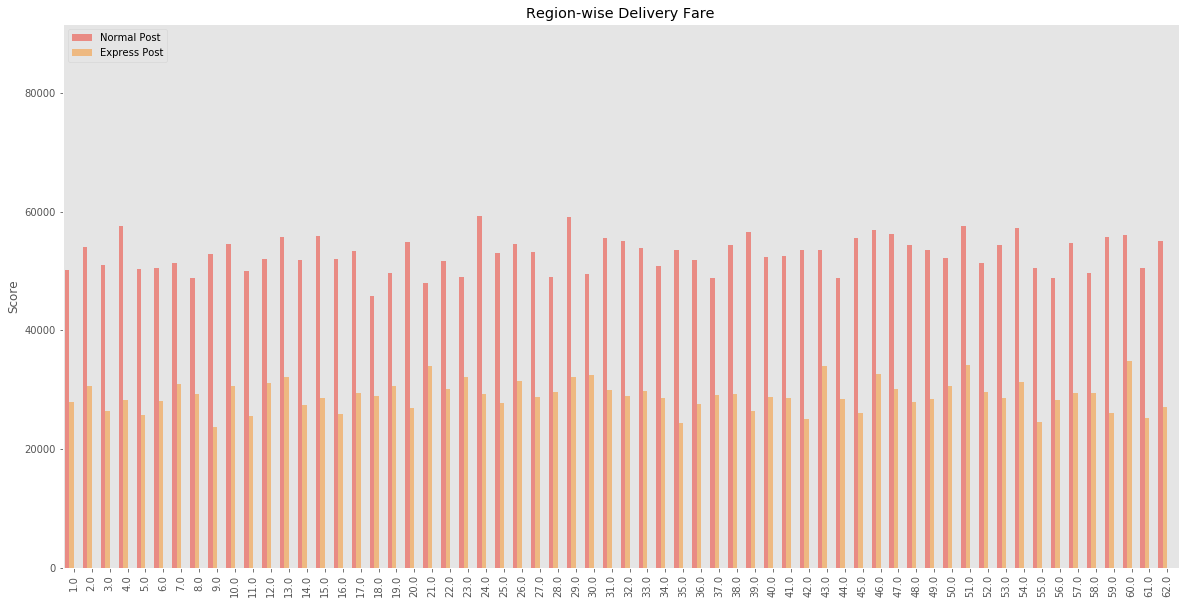

In [57]:
# Setting the positions and width for the bars
pos = list(range(len(df['Normal_Post']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['Normal_Post'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['Regions'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['Express_Post'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['Regions'][1]) 



# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Region-wise Delivery Fare')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Regions'],rotation='vertical')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['Normal_Post'] + df['Express_Post'])])

# Adding the legend and showing the plot
plt.legend(['Normal Post', 'Express Post'], loc='upper left')
# Adding the legend and showing the plot
plt.legend(['Normal Post', 'Express Post'], loc='upper left')

plt.grid()
plt.show()

# Number of Deliveries across Normal/Express per Region

The map shows the count of deliveries per region across the Post Types (Normal /Express)

In [58]:
df = droneDeliveryData.groupby(['Origin Region','Post Type']).count() 
df.reset_index(level=0, inplace=True)
df.reset_index(level=0, inplace=True)
postType0 = df[df["Post Type"]==0]
postType1 = df[df["Post Type"]==1]

regionList = list(postType1["Origin Region"])
postType0FareList = list(postType0["Id"])
postType1FareList = list(postType1["Id"])

raw_data = {'Regions': regionList,
        'Normal_Post': postType0FareList,
        'Express_Post': postType1FareList}
df = pd.DataFrame(raw_data, columns = ['Regions', 'Normal_Post', 'Express_Post'])

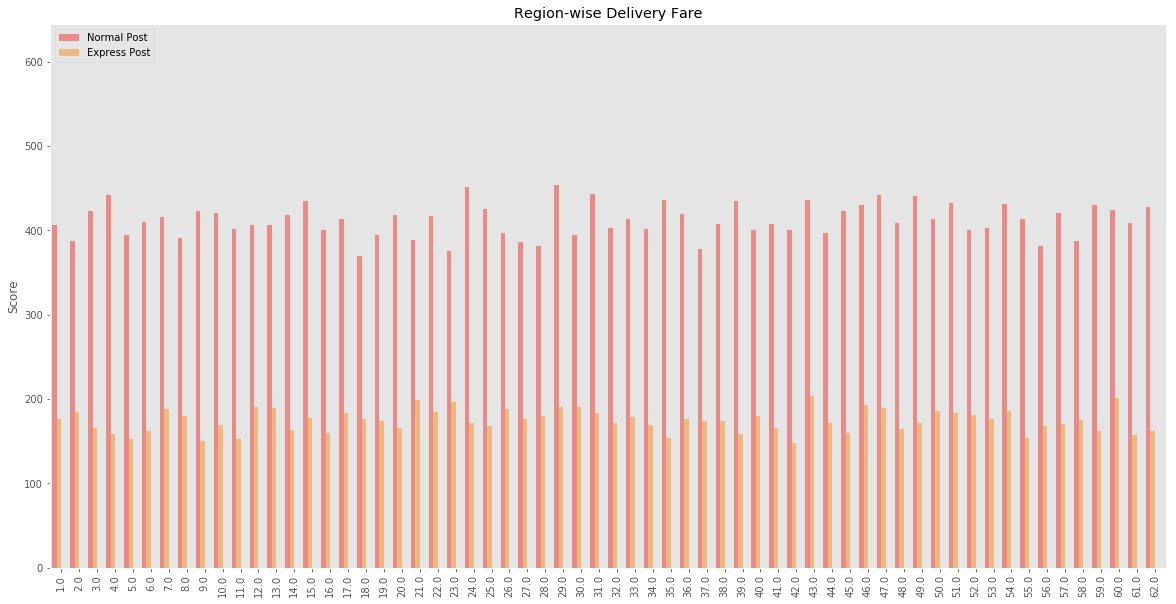

In [59]:
# Setting the positions and width for the bars
pos = list(range(len(df['Normal_Post']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,10))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['Normal_Post'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['Regions'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['Express_Post'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['Regions'][1]) 



# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Region-wise Delivery Fare')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Regions'],rotation='vertical')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['Normal_Post'] + df['Express_Post'])])

# Adding the legend and showing the plot
plt.legend(['Normal Post', 'Express Post'], loc='upper left')
# Adding the legend and showing the plot
plt.legend(['Normal Post', 'Express Post'], loc='upper left')

plt.grid()
plt.show()

In [60]:
df = droneDeliveryData.sort_values('Departure Date')
df.reset_index(level=0, inplace=True)

import datetime
count = 0
listDates = droneDeliveryData["Departure Date"]
for each in listDates:
    try:
        datetime.datetime.strptime(each, '%Y-%m-%d')
    except ValueError:
        count = count + 1
print("\nThe number of dates which are not in proper format: ---->",count)


The number of dates which are not in proper format: ----> 0


In [61]:
from datetime import datetime
for index,row in droneDeliveryData.iterrows():
    date_text = row["Departure Date"]
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        if(date_text == '2018-02-30'):
            continue
        elif(date_text == '2018-06-31'):
            continue
        elif(date_text == '2018-04-31'):
            continue
        result = datetime.strptime(date_text, '%Y-%d-%m').strftime('%Y-%m-%d')
        droneDeliveryData.at[index,"Departure Date"] = result

In [62]:
import datetime
count = 0
listDates = droneDeliveryData["Departure Date"]
for each in listDates:
    try:
        datetime.datetime.strptime(each, '%Y-%m-%d')
    except ValueError:
        count = count + 1
print("\nThe number of dates which are not in proper format: ---->",count)


The number of dates which are not in proper format: ----> 0


In [63]:
for index,row in droneDeliveryData.iterrows():
    date_text = row["Departure Date"]
    if(date_text == '2018-02-30'):
        droneDeliveryData.at[index,"Departure Date"] = "2018-02-28"
    elif(date_text == '2018-06-31'):
        droneDeliveryData.at[index,"Departure Date"] = "2018-06-30"
    elif(date_text == '2018-04-31'):
        droneDeliveryData.at[index,"Departure Date"] = "2018-04-30"

In [64]:
import datetime
count = 0
listDates = droneDeliveryData["Departure Date"]
for each in listDates:
    try:
        datetime.datetime.strptime(each, '%Y-%m-%d')
    except ValueError:
        print(each)
        count = count + 1
print("\nThe number of dates which are not in proper format: ---->",count)


The number of dates which are not in proper format: ----> 0


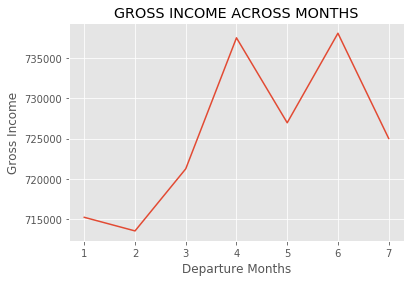

In [65]:
fn = lambda row: ((datetime.datetime.strptime(row["Departure Date"],'%Y-%m-%d')).month) # define a function for the new column
df = droneDeliveryData.assign(Month=droneDeliveryData.apply(fn, axis=1).values)

monthSumDF = df.groupby(['Month']).sum() 
monthSumDF.reset_index(level=0, inplace=True)

monthCountDF = df.groupby(['Month']).count() 
monthCountDF.reset_index(level=0, inplace=True)
plt.title('GROSS INCOME ACROSS MONTHS')
plt.xlabel('Departure Months')
plt.ylabel('Gross Income')
plt.plot(monthSumDF["Month"], monthSumDF["Delivery Fare"])
plt.show()

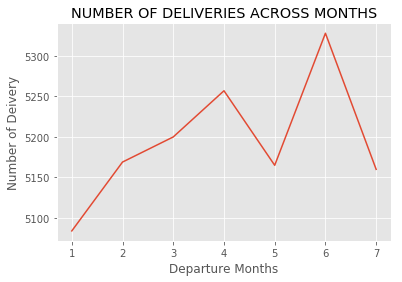

In [66]:
plt.plot(monthCountDF["Month"], monthCountDF["Delivery Fare"])
plt.title('NUMBER OF DELIVERIES ACROSS MONTHS')
plt.xlabel('Departure Months')
plt.ylabel('Number of Deivery')
plt.show()